# EDA 10 important Steps

# Import Liraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load DataSets

In [2]:
df = sns.load_dataset('titanic')

# Step 1: Data Shape


In [3]:
df.shape

# Agr dataset bhot bra ho to us ka Sample lna
# df = df.sample(1000)

(891, 15)

# Step 2: Data Structure

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


# Step 3: Find Missing Values

In [5]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## Percentage of Missing Values:


In [6]:
df.isnull().sum() / df.shape[0] * 100
#df.isnull().sum() / 891 * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

# Step 4: Split variables for new Columns / Features Engineering

In [7]:
city = pd.DataFrame (np.array([["Lahore, Pakistan",67, 100],["Belgium, germany", 33, 99],["Okla, China",62,20]]),
                    columns= ["Address","Males","Females"])
city

Address Males Females
0  Lahore, Pakistan    67     100
1  Belgium, germany    33      99
2       Okla, China    62      20

Lahore ko Pakistan sa elaidha krna ha

In [8]:
city[["City", "Country"]] = city["Address"].str.split(', ', expand=True)
city

Address Males Females     City   Country
0  Lahore, Pakistan    67     100   Lahore  Pakistan
1  Belgium, germany    33      99  Belgium   germany
2       Okla, China    62      20     Okla     China

# Step 5: Type Casting

In [9]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Address  3 non-null      object
 1   Males    3 non-null      object
 2   Females  3 non-null      object
 3   City     3 non-null      object
 4   Country  3 non-null      object
dtypes: object(5)
memory usage: 248.0+ bytes


Convert into integer

In [10]:
city[['Males','Females']] = city[['Males','Females']].astype('int')
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Address  3 non-null      object
 1   Males    3 non-null      int32 
 2   Females  3 non-null      int32 
 3   City     3 non-null      object
 4   Country  3 non-null      object
dtypes: int32(2), object(3)
memory usage: 224.0+ bytes


Convert into String

In [11]:
city[['City','Country']] = city[['City','Country']].astype('str')
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Address  3 non-null      object
 1   Males    3 non-null      int32 
 2   Females  3 non-null      int32 
 3   City     3 non-null      object
 4   Country  3 non-null      object
dtypes: int32(2), object(3)
memory usage: 224.0+ bytes


# Step 6: Summary Statistics

In [12]:
df.describe()

survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

# Step 7: Value Count of Specific Column

In [13]:
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [14]:
df['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

## Unique Values

In [15]:
df['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

# Step 8: Deal with Duplicates

In [16]:
df.duplicated().sum()

107

In [17]:
df[df.embark_town == 'Queenstown']

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
5           0       3    male   NaN      0      0   8.4583        Q  Third   
16          0       3    male   2.0      4      1  29.1250        Q  Third   
22          1       3  female  15.0      0      0   8.0292        Q  Third   
28          1       3  female   NaN      0      0   7.8792        Q  Third   
32          1       3  female   NaN      0      0   7.7500        Q  Third   
..        ...     ...     ...   ...    ...    ...      ...      ...    ...   
790         0       3    male   NaN      0      0   7.7500        Q  Third   
825         0       3    male   NaN      0      0   6.9500        Q  Third   
828         1       3    male   NaN      0      0   7.7500        Q  Third   
885         0       3  female  39.0      0      5  29.1250        Q  Third   
890         0       3    male  32.0      0      0   7.7500        Q  Third   

       who  adult_male deck embark_town alive  alone  
5      man        True  NaN  Queenstown    no   True  
16   child       False  NaN  Queenstown    no  False  
22   child       False  NaN  Queenstown   yes   True  
28   woman       False  NaN  Queenstown   yes   True  
32   woman       False  NaN  Queenstown   yes   True  
..     ...         ...  ...         ...   ...    ...  
790    man        True  NaN  Queenstown    no   True  
825    man        True  NaN  Queenstown    no   True  
828    man        True  NaN  Queenstown   yes   True  
885  woman       False  NaN  Queenstown    no  False  
890    man        True  NaN  Queenstown    no   True  

[77 rows x 15 columns]

# Step 9: Check Normality / Standard Normal Distribution

<AxesSubplot:xlabel='age', ylabel='Count'>

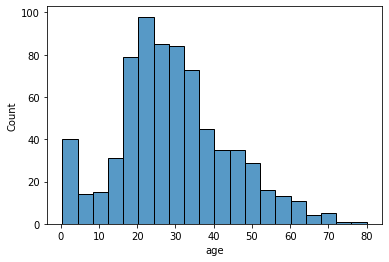

In [18]:
sns.histplot(df['age'])

c:\Users\Ammar Ak\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

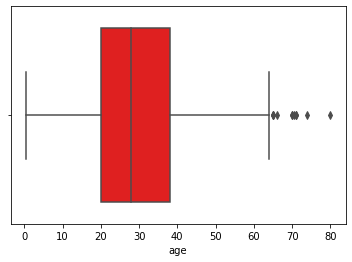

In [19]:
sns.boxplot(df['age'], color='red')

## Measure its Skewness ans kurtosis

In [20]:
df['age'].agg(['skew', 'kurtosis']).transpose()

skew        0.389108
kurtosis    0.178274
Name: age, dtype: float64

# Step 10: Correlation

In [21]:
cor =df.corr(method='pearson')
cor

survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
pclass     -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
age        -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
sibsp      -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   
parch       0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   
fare        0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   
adult_male -0.557080  0.094035  0.280328 -0.253586 -0.349943 -0.182024   
alone      -0.203367  0.135207  0.198270 -0.584471 -0.583398 -0.271832   

            adult_male     alone  
survived     -0.557080 -0.203367  
pclass        0.094035  0.135207  
age           0.280328  0.198270  
sibsp        -0.253586 -0.584471  
parch        -0.349943 -0.583398  
fare         -0.182024 -0.271832  
adult_male    1.000000  0.404744  
alone         0.404744  1.000000

<AxesSubplot:>

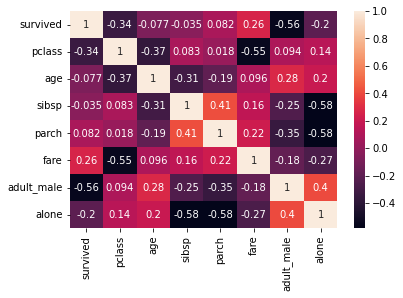

In [22]:
sns.heatmap(cor , annot=True)

In [23]:
cor.style.background_gradient(cmap='coolwarm')

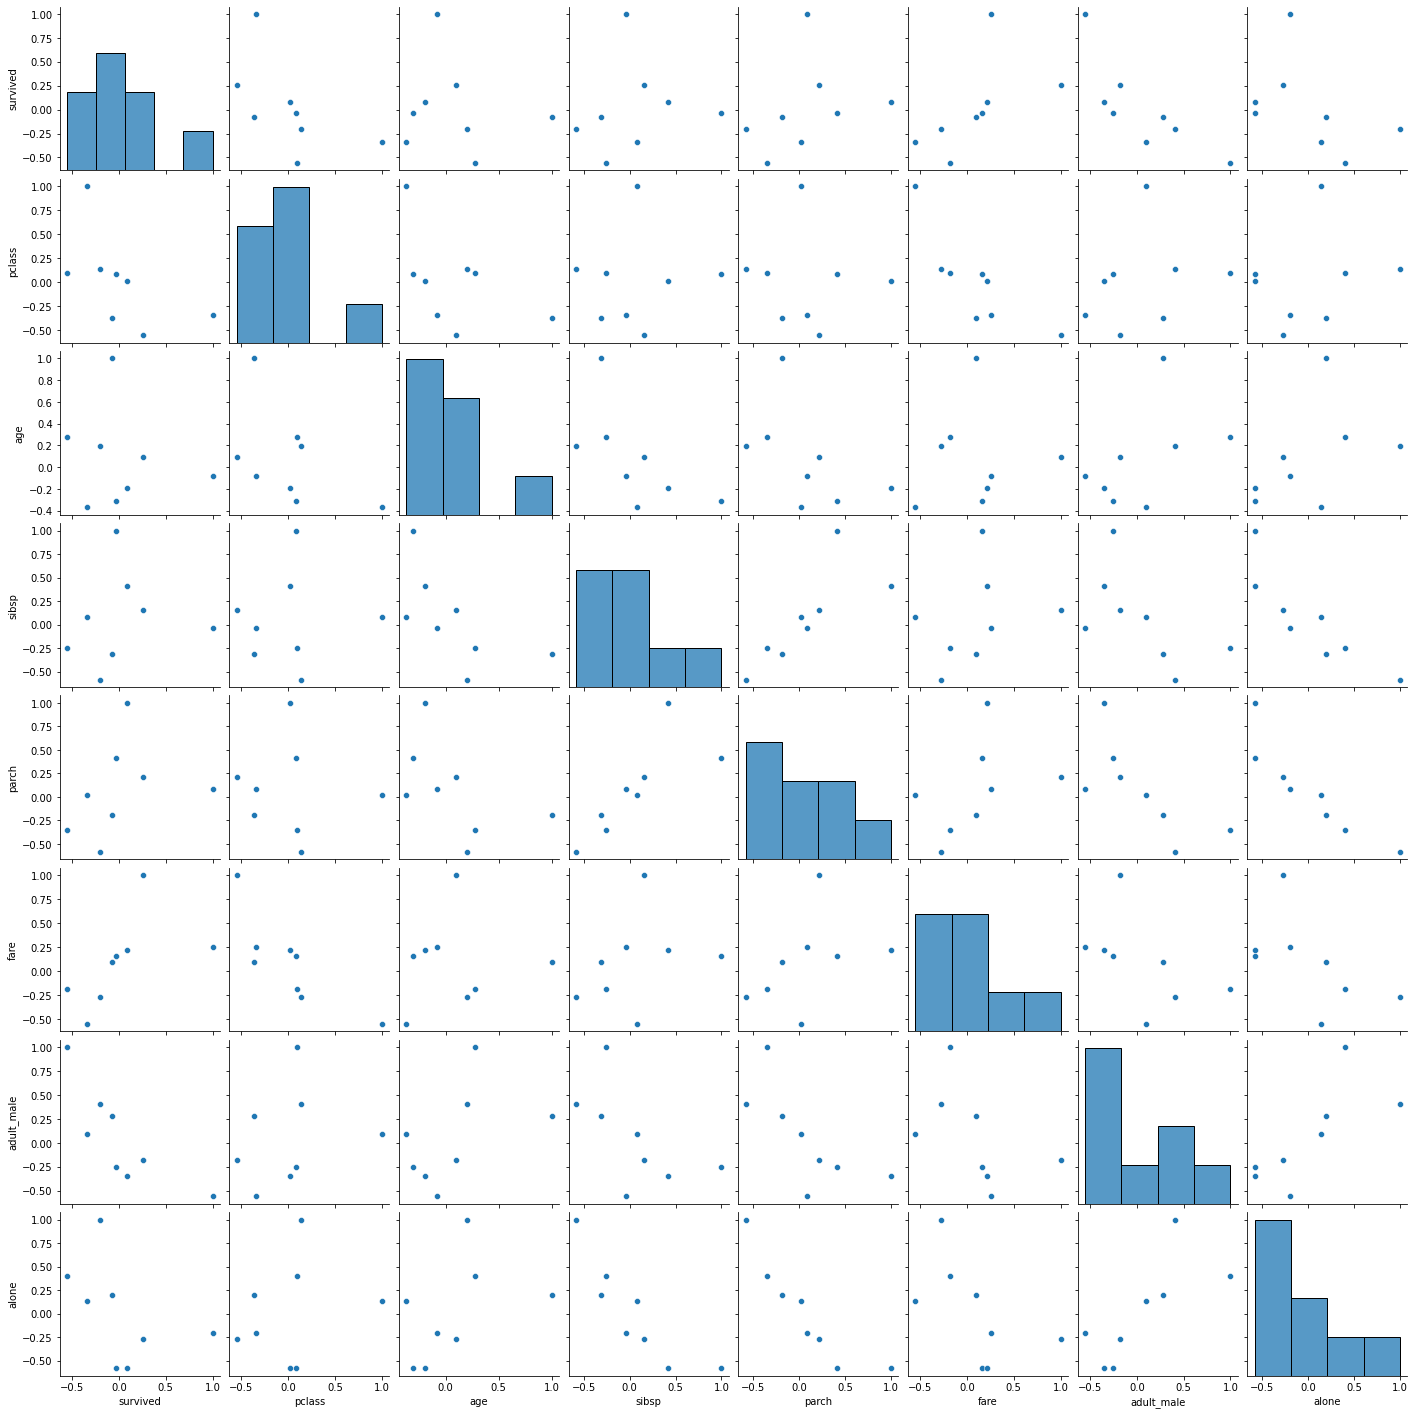

In [24]:
sns.pairplot(cor)